In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 6) 

1. Carregamento e Tratamento Inicial

    O objetivo é carregar os dados brutos de vendas, garantir que o Python entenda as datas e preparar uma visão mensal para análise de estoque.

In [3]:
# Carregando os dados
df = pd.read_csv('../data/vendas.csv')

# Conversão de Datas (ETL)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Ordenação Cronológica (Fundamental para Séries Temporais)
df = df.sort_values('Order Date')

# Verificando o range de datas
print(f"Data Inicial: {df['Order Date'].min()}")
print(f"Data Final: {df['Order Date'].max()}")
df.info()

Data Inicial: 2019-01-02 00:00:00
Data Final: 2022-12-11 00:00:00
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 79 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     4066 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   object        
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Catego

2. Transformação: De Transacional para Mensal

    Como o problema de negócio é Previsão de Estoque, a granularidade diária tem muito ruído. Vamos agrupar os dados por Soma Mensal para enxergar a tendência macro.

In [4]:
# Definindo o índice temporal
df = df.set_index('Order Date')

# Agrupando por Mês (Month Start - MS)
vendas_mensais = df['Quantity'].resample('MS').sum()

# Mostrando as primeiras linhas para garantir que funcionou
vendas_mensais.head()

Order Date
2019-01-01    286
2019-02-01    244
2019-03-01    211
2019-04-01    220
2019-05-01    277
Name: Quantity, dtype: int64

3. Análise Visual da Série Temporal

    Abaixo, plotamos a evolução das vendas. Note que ajustei o eixo X para mostrar marcações trimestrais, facilitando a leitura de picos sazonais.

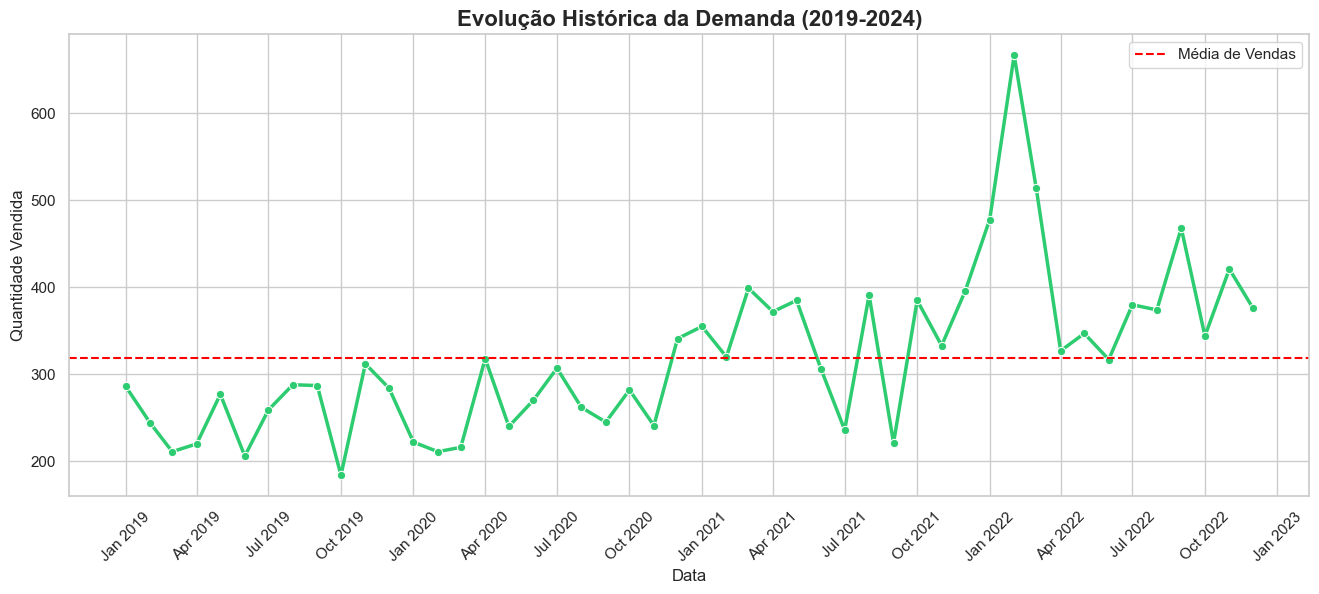

In [5]:
# Criando a figura e o eixo (ax) para termos controle total
fig, ax = plt.subplots(figsize=(16, 6))

# Plotando os dados
sns.lineplot(data=vendas_mensais, marker='o', color='#2ecc71', linewidth=2.5, ax=ax)

# --- AQUI ESTÁ A MÁGICA DO EIXO X ---
# Locator: Define onde ficam os "risquinhos". Interval=3 significa "a cada 3 meses".
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Formatter: Define como a data aparece. '%b %Y' vira 'Jan 2023'.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Roda as datas para caberem bonitinhas
plt.xticks(rotation=45)

# Títulos e Labels
plt.title('Evolução Histórica da Demanda (2019-2024)', fontsize=16, fontweight='bold')
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xlabel('Data', fontsize=12)

# Adiciona linha de média para referência
plt.axhline(vendas_mensais.mean(), color='red', linestyle='--', label='Média de Vendas')
plt.legend()

plt.show()

4. Decomposição de Série Temporal

    Utilizei o método estatístico para separar o que é Tendência (crescimento orgânico da empresa) do que é Sazonalidade (padrões repetitivos).

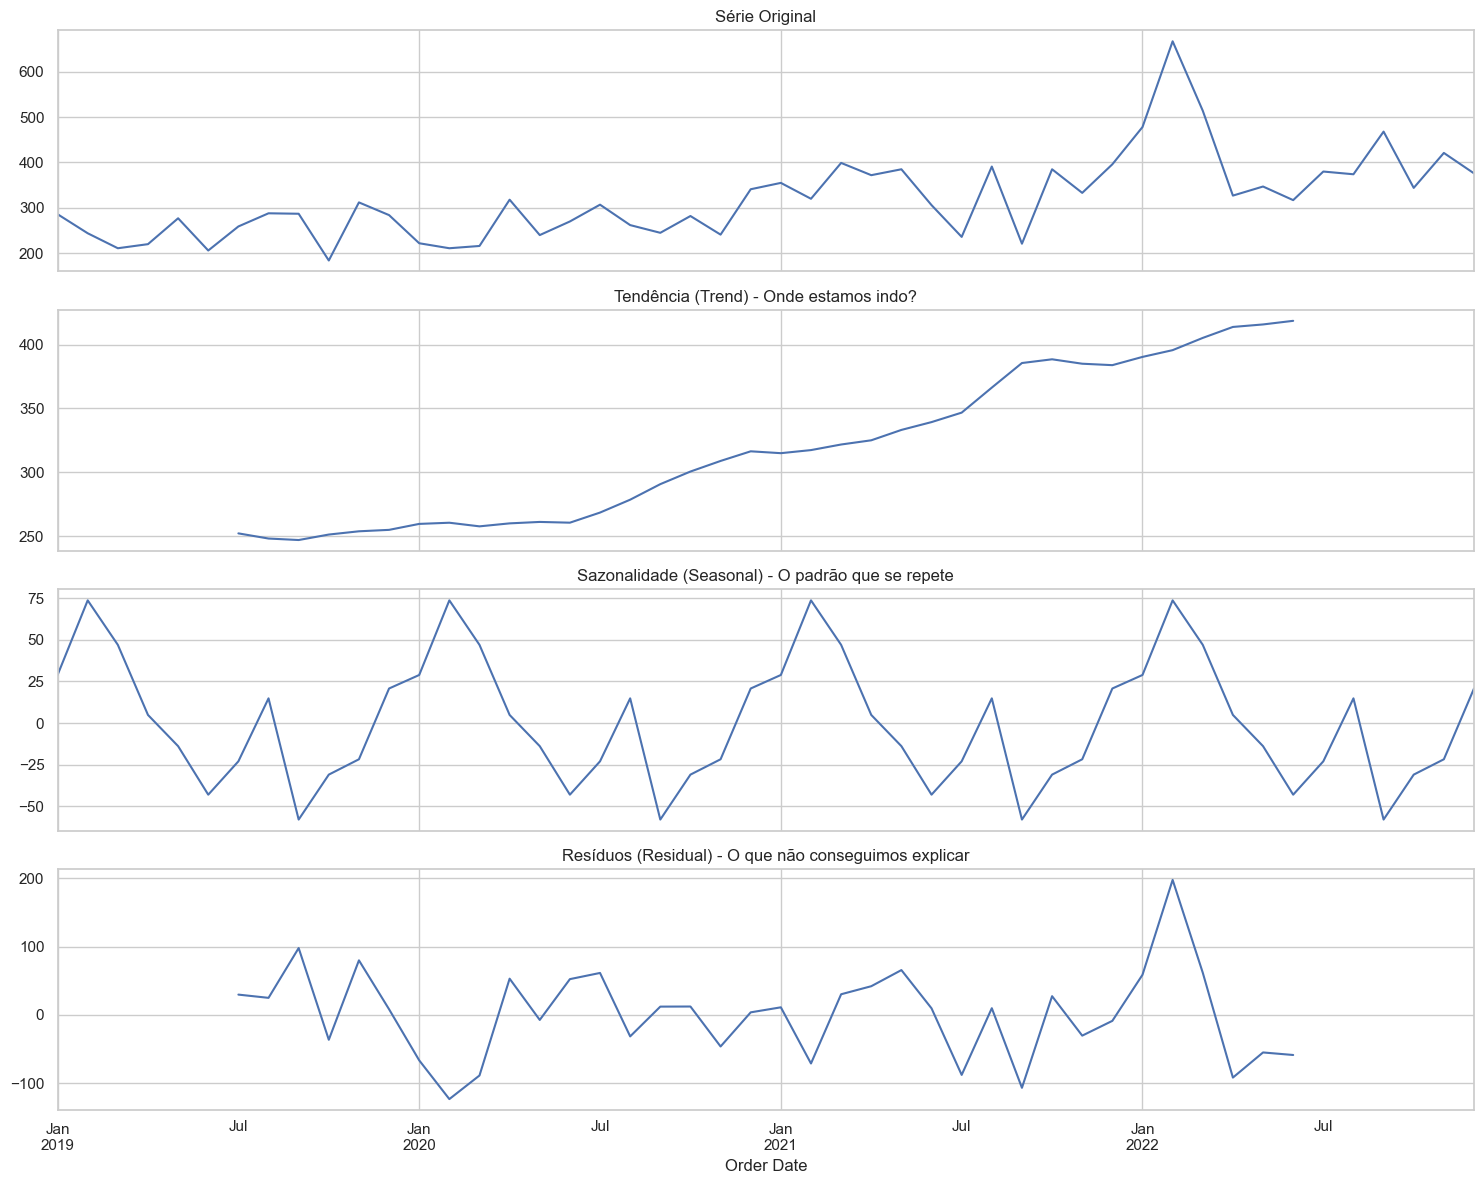

In [6]:
# Decomposição Aditiva
resultado = seasonal_decompose(vendas_mensais, model='additive')

# Plotando
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

resultado.observed.plot(ax=ax1, title='Série Original')
resultado.trend.plot(ax=ax2, title='Tendência (Trend) - Onde estamos indo?')
resultado.seasonal.plot(ax=ax3, title='Sazonalidade (Seasonal) - O padrão que se repete')
resultado.resid.plot(ax=ax4, title='Resíduos (Residual) - O que não conseguimos explicar')

plt.tight_layout()
plt.show()

5. Conclusões da Análise

    - Tendência: Observa-se uma tendência clara de crescimento ao longo dos anos.

    - Sazonalidade: Existem picos claros no final de cada ano (Novembro/Dezembro) e quedas no início do ano.

    
O próximo passo (Notebook 3.0) será utilizar modelos preditivos (Holt-Winters) para projetar esse comportamento para o futuro.

In [7]:
# Salvando o dataset processado para ser usado no Notebook de Modelagem
vendas_mensais.to_csv('../data/vendas_mensais.csv')
print("Arquivo 'vendas_mensais.csv' salvo com sucesso na pasta data/.")

Arquivo 'vendas_mensais.csv' salvo com sucesso na pasta data/.
